In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.skew()

/var/folders/jw/d4zv27ws3sn9hb1g62hk8nnr0000gq/T/ipykernel_51143/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [7]:
# Checking for null value
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [10]:
#Columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
#Checking for Percentage of Null Values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [15]:
#outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [18]:
#Removing Outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [20]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [66]:
df.dropna(inplace=True)

In [67]:
data_numeric = df.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

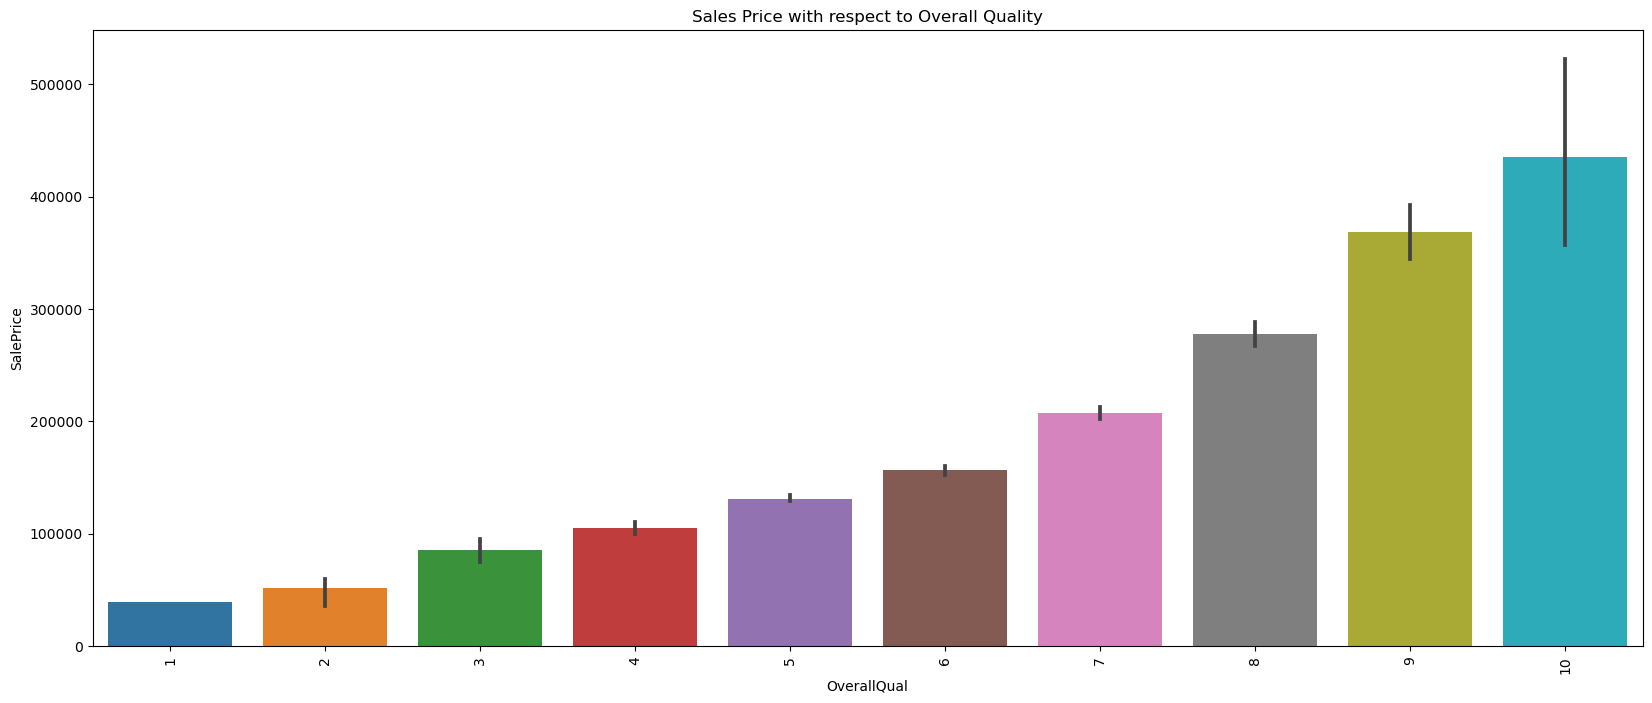

In [91]:
#Plotting 'Overall Quality' with respect to 'SalePrice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

/var/folders/jw/d4zv27ws3sn9hb1g62hk8nnr0000gq/T/ipykernel_51143/3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

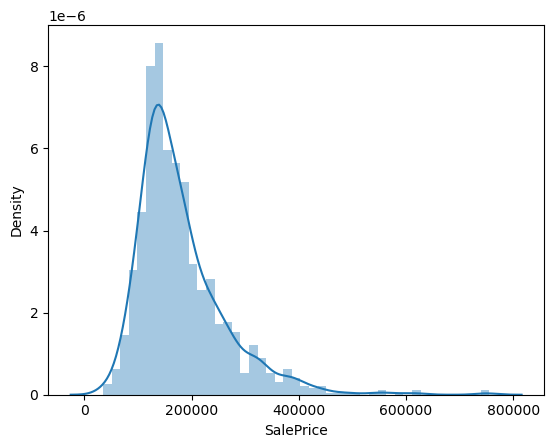

In [92]:
sns.distplot(df['SalePrice'])

In [93]:
#Correlation Matrix check
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.384440,-0.200353,0.009306,-0.055611,-0.002436,0.009658,0.027187,-0.069542,-0.059007,...,-0.021025,-0.001442,-0.016707,-0.040006,-0.027182,0.001186,0.009533,-0.025192,-0.008307,-0.097819
LotFrontage,-0.384440,1.000000,0.425532,0.250041,-0.058809,0.123081,0.088476,0.193458,0.234828,0.050253,...,0.087193,0.149615,0.011031,0.070283,0.041706,0.206706,0.003486,0.010490,0.008440,0.350279
LotArea,-0.200353,0.425532,1.000000,0.182356,-0.036970,0.050075,0.039227,0.114832,0.234066,0.138161,...,0.139897,0.097673,-0.028579,0.014733,0.077470,0.109703,0.003431,0.010368,-0.008929,0.311936
OverallQual,0.009306,0.250041,0.182356,1.000000,-0.125784,0.586835,0.560117,0.431995,0.264904,-0.055882,...,0.287409,0.323218,-0.150340,0.023873,0.070661,0.080524,-0.071466,0.080470,-0.021333,0.801139
OverallCond,-0.055611,-0.058809,-0.036970,-0.125784,1.000000,-0.401115,0.062530,-0.160909,-0.048056,0.043086,...,-0.011480,-0.054074,0.064459,-0.006760,0.081197,-0.022417,0.079778,-0.009351,0.038725,-0.111427
YearBuilt,-0.002436,0.123081,0.050075,0.586835,-0.401115,1.000000,0.594694,0.343561,0.254653,-0.037729,...,0.246564,0.196492,-0.400728,0.032785,-0.044280,0.010488,-0.092717,0.014784,-0.015283,0.538970
YearRemodAdd,0.009658,0.088476,0.039227,0.560117,0.062530,0.594694,1.000000,0.196738,0.134570,-0.048291,...,0.240652,0.247577,-0.199024,0.028317,-0.025290,0.020529,-0.058966,0.027095,0.035636,0.519578
MasVnrArea,0.027187,0.193458,0.114832,0.431995,-0.160909,0.343561,0.196738,1.000000,0.291641,-0.069990,...,0.181313,0.122857,-0.121844,0.025498,0.060394,0.023632,-0.052145,0.017849,-0.022471,0.497168
BsmtFinSF1,-0.069542,0.234828,0.234066,0.264904,-0.048056,0.254653,0.134570,0.291641,1.000000,-0.032080,...,0.215210,0.117184,-0.108832,0.024311,0.065520,0.191945,-0.009765,-0.014122,0.005407,0.400422
BsmtFinSF2,-0.059007,0.050253,0.138161,-0.055882,0.043086,-0.037729,-0.048291,-0.069990,-0.032080,1.000000,...,0.037348,0.006926,0.037138,-0.029456,0.069297,0.061053,0.007606,-0.031560,0.034592,-0.016681


In [99]:
#Plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df.Utilities.value_counts()

In [ ]:
#We can now drop columns that showing very low variance and thus NOT required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

DATA PREPARATION

In [ ]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [ ]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

In [ ]:
numerical_columns = list(numeric_type.index)
print(numerical_columns)

In [ ]:
categorical_columns = list(categorical_type.index)
print(categorical_columns)

In [ ]:
#create dummies 

In [ ]:
df = pd.get_dummies(df, drop_first=True )
df.head()

In [ ]:
X = df.drop(['SalePrice'], axis=1)
X.head()

In [ ]:
y = df['SalePrice']
y.head()

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [ ]:
#Importing RFE and LinearRegression
#Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [103]:
#Predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9352917438718787

In [104]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.7794805915177704

In [105]:
#List of values for alphas to be tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

#CrossValidation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
model_cv.best_params_

{'alpha': 20}

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=11]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007217,0.002552,0.002987,0.000836,0.0001,{'alpha': 0.0001},-22051.557378,-22480.270552,-22500.447732,-26297.081350,...,-23901.188022,1914.154692,27,-13031.166258,-13162.610740,-12632.152241,-12396.934850,-12810.939975,-12806.760813,274.025514
1,0.004822,0.000216,0.002221,0.000079,0.001,{'alpha': 0.001},-22044.543196,-22417.989035,-22439.958367,-26292.480911,...,-23860.104260,1915.789887,26,-13037.916278,-13188.472486,-12646.962905,-12399.268825,-12823.644561,-12819.253011,279.365899
2,0.004833,0.000129,0.002191,0.000030,0.01,{'alpha': 0.01},-21975.035571,-22276.066663,-22186.782150,-26246.677738,...,-23660.134402,1867.726690,24,-13101.812846,-13444.384459,-12827.273248,-12419.457124,-12968.132110,-12952.211957,335.947925
3,0.004972,0.000412,0.002309,0.000143,0.05,{'alpha': 0.05},-21845.808736,-22255.392266,-22213.612270,-26087.635322,...,-23453.820682,1702.535159,23,-13333.370817,-14256.317138,-13556.868158,-12475.088688,-13564.441330,-13437.217226,572.346466
4,0.005320,0.000557,0.002392,0.000266,0.1,{'alpha': 0.1},-21788.135060,-22052.810565,-22296.794774,-25952.658090,...,-23320.841498,1634.343489,22,-13531.896039,-14672.303850,-13964.852619,-12520.892277,-13986.337839,-13735.256525,708.498397


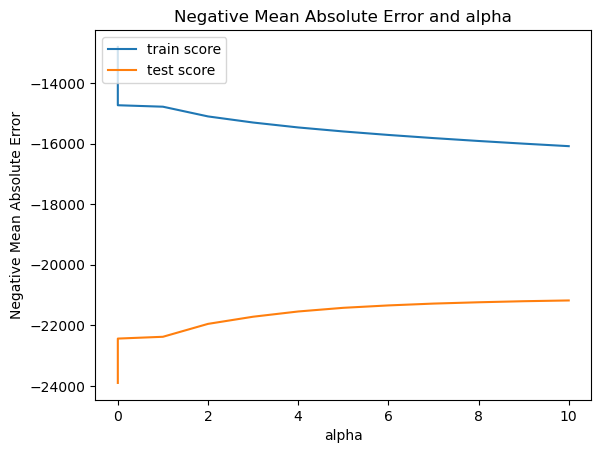

In [108]:
#Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

#Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.06223648e+02, -1.53714334e+02,  1.29917532e-01,  1.22445382e+04,
        4.99332798e+03,  1.25100890e+02,  1.54623351e+02,  2.68728887e+01,
       -1.18325374e+01, -5.96090184e+00,  6.52744226e+00,  4.48046652e+00,
        2.21483562e+01,  9.91820204e+00,  3.65470256e+01,  1.06579348e+04,
        8.53198453e+02,  1.05101176e+04,  4.63253643e+03, -2.06361599e+03,
       -2.83629967e+03,  6.77130056e+03,  2.69784211e+01,  2.62062789e+01,
       -1.06100035e+01, -2.82554545e+00,  4.00507990e+01,  6.83819719e+01,
       -1.02550619e+02, -1.23135354e+00, -8.87057993e+02, -1.07951766e+03,
        7.32297981e+03,  3.56931217e+01,  4.91498375e+03, -4.79109012e+03,
       -5.53149899e+03, -3.08510416e+02,  1.10999743e+04, -1.85495443e+04,
       -1.30279988e+02,  5.22892953e+03,  2.37740039e+02,  1.37036999e+04,
        1.22921377e+04, -6.59283233e+03, -4.16366086e+03, -2.82883375e+03,
        3.03977895e+03, -3.57415244e+03, -6.25314638e+02,  5.52436501e+02,
        3.55562758e+03,  

In [110]:
#Ridge Model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1610281.984),
 ('MSSubClass', -206.224),
 ('LotFrontage', -153.714),
 ('LotArea', 0.13),
 ('OverallQual', 12244.538),
 ('OverallCond', 4993.328),
 ('YearBuilt', 125.101),
 ('YearRemodAdd', 154.623),
 ('MasVnrArea', 26.873),
 ('BsmtFinSF1', -11.833),
 ('BsmtFinSF2', -5.961),
 ('TotalBsmtSF', 6.527),
 ('1stFlrSF', 4.48),
 ('2ndFlrSF', 22.148),
 ('LowQualFinSF', 9.918),
 ('GrLivArea', 36.547),
 ('BsmtFullBath', 10657.935),
 ('BsmtHalfBath', 853.198),
 ('FullBath', 10510.118),
 ('HalfBath', 4632.536),
 ('BedroomAbvGr', -2063.616),
 ('KitchenAbvGr', -2836.3),
 ('Fireplaces', 6771.301),
 ('GarageArea', 26.978),
 ('WoodDeckSF', 26.206),
 ('OpenPorchSF', -10.61),
 ('EnclosedPorch', -2.826),
 ('3SsnPorch', 40.051),
 ('ScreenPorch', 68.382),
 ('PoolArea', -102.551),
 ('MiscVal', -1.231),
 ('MoSold', -887.058),
 ('YrSold', -1079.518),
 ('MSZoning_FV', 7322.98),
 ('MSZoning_RH', 35.693),
 ('MSZoning_RL', 4914.984),
 ('MSZoning_RM', -4791.09),
 ('Alley_Pave', -5531.499),
 ('Alley_none

In [111]:
# ridge regression
lm = Ridge(alpha = 10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8974547795552964
0.843338879079357


In [112]:
#Creating a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [113]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(10)

,Variable,Coeff
0,constant,1610281.984
65,Neighborhood_NoRidge,27450.024
66,Neighborhood_NridgHt,27207.220
72,Neighborhood_StoneBr,25553.011
112,RoofMatl_WdShngl,24614.193
166,BsmtExposure_Gd,15572.452
84,Condition2_Norm,15219.933
90,BldgType_2fmCon,14248.185
44,LandContour_Lvl,13703.700
56,Neighborhood_Crawfor,13215.878


In [114]:
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE.head(20)

,Variable,Coeff
0,constant,1610281.984
1,MSSubClass,-206.224
2,LotFrontage,-153.714
3,LotArea,0.130
4,OverallQual,12244.538
5,OverallCond,4993.328
6,YearBuilt,125.101
7,YearRemodAdd,154.623
8,MasVnrArea,26.873
9,BsmtFinSF1,-11.833


Lasso Regression Model

In [115]:

#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+11, tolerance: 4.355e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+11, tolerance: 4.759e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+11, tolerance: 4.709e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+11, tolerance: 4.591e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+11, tolerance: 4.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+11, tolerance: 4.709e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+11, tolerance: 4.759e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+11, tolerance: 4.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.449e+11, tolerance: 4.591e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.622e+09, tolerance: 4.355e+08
  model = cd_fast.enet_coordinate_descent(
/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
model_cv.best_params_

{'alpha': 100}

In [117]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091082,0.008959,0.002649,0.000173,0.0001,{'alpha': 0.0001},-22431.543689,-22192.219757,-20855.027788,-26351.796652,...,-23671.979021,2324.191408,21,-13039.270125,-13166.062804,-12635.661691,-12405.684590,-12811.710507,-12811.677943,273.202912
1,0.090680,0.007569,0.002684,0.000070,0.001,{'alpha': 0.001},-22438.496062,-22184.947042,-20855.673665,-26353.523488,...,-23673.699479,2326.232317,22,-13039.259129,-13166.064848,-12635.639910,-12405.697777,-12811.729672,-12811.678267,273.200499
2,0.090586,0.006741,0.002850,0.000333,0.01,{'alpha': 0.01},-22508.570913,-22112.960119,-20862.098049,-26370.792606,...,-23684.030269,2338.210888,23,-13039.220448,-13166.161581,-12635.732190,-12405.972809,-12812.014065,-12811.820219,273.125545
3,0.091452,0.008236,0.002836,0.000228,0.05,{'alpha': 0.05},-22827.536341,-22050.035648,-20889.794016,-26414.385160,...,-23752.196318,2324.868394,26,-13039.216862,-13167.231331,-12636.341973,-12407.191568,-12813.349152,-12812.666177,272.962273
4,0.089817,0.006059,0.002889,0.000368,0.1,{'alpha': 0.1},-23078.810996,-22028.568964,-20906.557303,-26376.097262,...,-23787.729585,2289.999653,27,-13040.066146,-13168.698901,-12637.507017,-12408.650348,-12814.794500,-12813.943382,272.901426


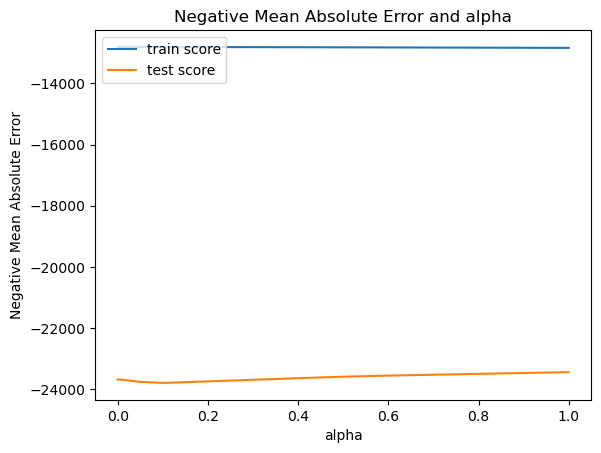

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [119]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

/Users/y0g03pj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.856e+11, tolerance: 5.735e+08
  model = cd_fast.enet_coordinate_descent(


array([-5.06181436e+01,  1.14491639e+02,  7.08682036e-01,  6.50610252e+03,
        5.63867018e+03,  1.94428754e+02,  1.44070193e+02,  1.58620890e+01,
        8.35025675e+00, -3.79385767e+00,  2.15549020e+01,  3.68928701e+01,
        5.74187059e+01,  1.98043495e+01,  5.89889238e+00,  3.65139305e+03,
       -1.61408450e+02,  9.42644597e+03,  2.72533581e+03, -2.95466312e+03,
       -8.26513244e+03,  9.89392054e+03,  2.05898930e+01,  1.85644705e+01,
        4.72993884e-01, -4.77976633e+00,  4.17636137e+01,  3.96985925e+01,
        3.42670403e+02, -3.51736978e+00, -6.75576931e+02, -9.27596946e+02,
        3.61237292e+04,  3.12683144e+04,  2.50645212e+04,  2.41156524e+04,
       -6.91830512e+03, -4.67118099e+03,  3.08531767e+03,  5.34269531e+03,
        3.80646080e+03,  7.35818071e+03, -1.30065883e+04,  1.05195511e+04,
        2.06669233e+04, -7.94244776e+03, -2.70791718e+04, -1.17518469e+03,
        3.82610942e+03, -5.42097877e+04,  1.02443760e+03,  4.90982761e+03,
       -6.66500559e+03, -

In [120]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 315296.313),
 ('MSSubClass', -50.618),
 ('LotFrontage', 114.492),
 ('LotArea', 0.709),
 ('OverallQual', 6506.103),
 ('OverallCond', 5638.67),
 ('YearBuilt', 194.429),
 ('YearRemodAdd', 144.07),
 ('MasVnrArea', 15.862),
 ('BsmtFinSF1', 8.35),
 ('BsmtFinSF2', -3.794),
 ('TotalBsmtSF', 21.555),
 ('1stFlrSF', 36.893),
 ('2ndFlrSF', 57.419),
 ('LowQualFinSF', 19.804),
 ('GrLivArea', 5.899),
 ('BsmtFullBath', 3651.393),
 ('BsmtHalfBath', -161.408),
 ('FullBath', 9426.446),
 ('HalfBath', 2725.336),
 ('BedroomAbvGr', -2954.663),
 ('KitchenAbvGr', -8265.132),
 ('Fireplaces', 9893.921),
 ('GarageArea', 20.59),
 ('WoodDeckSF', 18.564),
 ('OpenPorchSF', 0.473),
 ('EnclosedPorch', -4.78),
 ('3SsnPorch', 41.764),
 ('ScreenPorch', 39.699),
 ('PoolArea', 342.67),
 ('MiscVal', -3.517),
 ('MoSold', -675.577),
 ('YrSold', -927.597),
 ('MSZoning_FV', 36123.729),
 ('MSZoning_RH', 31268.314),
 ('MSZoning_RL', 25064.521),
 ('MSZoning_RM', 24115.652),
 ('Alley_Pave', -6918.305),
 ('Alley_none', 